In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


# Load data set

In [ ]:
df_test=pd.read_csv("TruistTestCleaned.csv" , usecols = ['id','age','job','marital','education','default','balance','housing','loan'
                                            ,'day','month','duration','campaign','pdays','previous','poutcome'
                                            ,'generation','state'])
df_train=pd.read_csv("TruistTrainCleaned.csv", usecols = ['id','age','job','marital','education','default','balance','housing','loan'
                                            ,'day','month','duration','campaign','pdays','previous','poutcome'
                                            ,'cd','generation','state',])


# Analyze data

In [ ]:
df_train.head(3)

,day,education,job,generation,previous,campaign,marital,age,default,balance,housing,loan,month,duration,pdays,poutcome,state,id,cd
0,29,tertiary,student,Millennials,1,39,married,33,no,17068,yes,yes,feb,3727,220,failure,AS,23192,1
1,29,tertiary,management,Millennials,6,6,married,29,no,999,no,no,feb,4080,323,failure,IA,2011,0
2,29,tertiary,management,Gen X,15,38,married,39,no,4896,no,no,feb,172,115,failure,PA,14021,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   day         36871 non-null  int64 
 1   education   36871 non-null  object
 2   job         36871 non-null  object
 3   generation  36871 non-null  object
 4   previous    36871 non-null  int64 
 5   campaign    36871 non-null  int64 
 6   marital     36871 non-null  object
 7   age         36871 non-null  int64 
 8   default     36871 non-null  object
 9   balance     36871 non-null  int64 
 10  housing     36871 non-null  object
 11  loan        36871 non-null  object
 12  month       36871 non-null  object
 13  duration    36871 non-null  int64 
 14  pdays       36871 non-null  int64 
 15  poutcome    36871 non-null  object
 16  state       36871 non-null  object
 17  id          36871 non-null  int64 
 18  cd          36871 non-null  int64 
dtypes: int64(9), object(10)
memory usage: 5.3+ MB


# Datasets clean up

In [ ]:
#Get unique values in each of the Objects
df_train['job'].unique()

array(['student', 'management', 'retired', 'blue-collar', 'unknown',
       'services', 'technician', 'admin.', 'unemployed', 'entrepreneur',
       'housemaid', 'self-employed'], dtype=object)

In [ ]:
#Converting to Upper case
df_train['job'] = df_train['job'].str.upper()
#removing all the special character
df_train['job'] = df_train['job'].str.replace('\W', '')
#Replace NaNs to Unknown. Since Unknown is already a category
df_train[['job']] = df_train[['job']].fillna('UNKNOWN')
#df_train['job'].fillna('UNKNOWN')
df_train['job'].unique()

C:\Users\pramo\AppData\Local\Temp\ipykernel_30120\3222945724.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['job'] = df_train['job'].str.replace('\W', '')


array(['STUDENT', 'MANAGEMENT', 'RETIRED', 'BLUECOLLAR', 'UNKNOWN',
       'SERVICES', 'TECHNICIAN', 'ADMIN', 'UNEMPLOYED', 'ENTREPRENEUR',
       'HOUSEMAID', 'SELFEMPLOYED'], dtype=object)

In [ ]:
df_train['marital'].unique()
#Converting to Upper case
df_train['marital'] = df_train['marital'].str.upper()
df_train[['marital']] = df_train[['marital']].fillna('UNKNOWN')
df_train['marital'].unique()

array(['MARRIED', 'SINGLE', 'DIVORCED', 'OTHER'], dtype=object)

In [ ]:
df_train['education'].unique()

array(['tertiary', 'primary', 'secondary'], dtype=object)

In [ ]:
#Converting to Upper case
df_train['education'] = df_train['education'].str.upper()
#Replacing the PRIMERY to PRIMARY
df_train['education'] = df_train['education'].str.replace('PRIMERY', 'PRIMARY')
#Replacing the SECENDARY to SECONDARY
df_train['education'] = df_train['education'].str.replace('SECENDARY', 'SECONDARY')
df_train['education'].unique()

array(['TERTIARY', 'PRIMARY', 'SECONDARY'], dtype=object)

In [ ]:
df_train['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df_train['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df_train['loan'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
#df_train['contact'].unique()

In [ ]:
df_train['month'].unique()

array(['feb', 'apr', 'jun', 'sep', 'nov', 'jan', 'jul', 'dec', 'aug',
       'may', 'mar', 'oct'], dtype=object)

In [ ]:
df_train['poutcome'].unique()

array(['failure', 'success', 'unknown'], dtype=object)

In [ ]:
df_train['generation'].unique()

array(['Millennials', 'Gen X', 'Younger Boomers', 'Older Boomers',
       'Silent Generation'], dtype=object)

In [ ]:
#Converting to Upper case
df_train['generation'] = df_train['generation'].str.upper()
#Replacing the MILLENIALS to MILLENNIALS
df_train['generation'] = df_train['generation'].str.replace('MILLENIALS', 'MILLENNIALS')
#Replacing the OLER BOOMERS to OLDER BOOMERS
df_train['generation'] = df_train['generation'].str.replace('OLER BOOMERS', 'OLDER BOOMERS')
df_train[['generation']] = df_train[['generation']].fillna('UNKNOWN')
df_train['generation'].unique()

array(['MILLENNIALS', 'GEN X', 'YOUNGER BOOMERS', 'OLDER BOOMERS',
       'SILENT GENERATION'], dtype=object)

In [ ]:
df_train['state'].unique()

array(['AS', 'IA', 'PA', 'RI', 'MA', 'TX', 'GA', 'MS', 'MN', 'WV', 'ME',
       'WI', 'HI', 'SC', 'FL', 'MH', 'CO', 'NM', 'VI', 'AL', 'DE', 'FM',
       'IN', 'LA', 'CA', 'NC', 'MD', 'ND', 'VT', 'ID', 'WA', 'MI', 'PW',
       'AK', 'AR', 'MT', 'OH', 'NV', 'CT', 'KY', 'TN', 'MP', 'KS', 'VA',
       'WY', 'NH', 'UT', 'NE', 'AZ', 'NY', 'OR', 'MO', 'GU', 'SD', 'IL',
       'DC', 'OK', 'NJ', 'PR'], dtype=object)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   day         36871 non-null  int64 
 1   education   36871 non-null  object
 2   job         36871 non-null  object
 3   generation  36871 non-null  object
 4   previous    36871 non-null  int64 
 5   campaign    36871 non-null  int64 
 6   marital     36871 non-null  object
 7   age         36871 non-null  int64 
 8   default     36871 non-null  object
 9   balance     36871 non-null  int64 
 10  housing     36871 non-null  object
 11  loan        36871 non-null  object
 12  month       36871 non-null  object
 13  duration    36871 non-null  int64 
 14  pdays       36871 non-null  int64 
 15  poutcome    36871 non-null  object
 16  state       36871 non-null  object
 17  id          36871 non-null  int64 
 18  cd          36871 non-null  int64 
dtypes: int64(9), object(10)
memory usage: 5.3+ MB


In [ ]:
#Checking for NaNs
value = df_train.isnull().values.any()
print(value)

False


In [ ]:
print(df_train.isnull().values.ravel().sum())

0


In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   day         36871 non-null  int64 
 1   education   36871 non-null  object
 2   job         36871 non-null  object
 3   generation  36871 non-null  object
 4   previous    36871 non-null  int64 
 5   campaign    36871 non-null  int64 
 6   marital     36871 non-null  object
 7   age         36871 non-null  int64 
 8   default     36871 non-null  object
 9   balance     36871 non-null  int64 
 10  housing     36871 non-null  object
 11  loan        36871 non-null  object
 12  month       36871 non-null  object
 13  duration    36871 non-null  int64 
 14  pdays       36871 non-null  int64 
 15  poutcome    36871 non-null  object
 16  state       36871 non-null  object
 17  id          36871 non-null  int64 
 18  cd          36871 non-null  int64 
dtypes: int64(9), object(10)
memory usage: 5.3+ MB


In [ ]:
#Checking for NaNs
value = df_train.isnull().values.any()
print(value)

False


# Performing the same clean up on test dataset

In [ ]:
#Converting to Upper case
df_test['job'] = df_test['job'].str.upper()
#removing all the special character
df_test['job'] = df_test['job'].str.replace('\W', '')
#Replace NaNs to Unknown. Since Unknown is already a category
df_test[['job']] = df_test[['job']].fillna('UNKNOWN')
df_test['job'].unique()


C:\Users\pramo\AppData\Local\Temp\ipykernel_30120\2901495469.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['job'] = df_test['job'].str.replace('\W', '')


array(['ENTREPRENEUR', 'MANAGEMENT', 'ADMIN', 'STUDENT', 'RETIRED',
       'UNEMPLOYED', 'BLUECOLLAR', 'HOUSEMAID', 'UNKNOWN', 'SELFEMPLOYED',
       'SERVICES', 'TECHNICIAN'], dtype=object)

In [ ]:
df_test['marital'] = df_test['marital'].str.upper()
df_test[['marital']] = df_test[['marital']].fillna('UNKNOWN')
df_test['marital'].unique()


array(['MARRIED', 'SINGLE', 'DIVORCED', 'OTHER'], dtype=object)

In [ ]:
#Converting to Upper case
df_test['education'] = df_test['education'].str.upper()
#Replacing the PRIMERY to PRIMARY
df_test['education'] = df_test['education'].str.replace('PRIMERY', 'PRIMARY')
#Replacing the SECENDARY to SECONDARY
df_test['education'] = df_test['education'].str.replace('SECENDARY', 'SECONDARY')
df_test['education'].unique()

array(['TERTIARY', 'SECONDARY', 'PRIMARY'], dtype=object)

In [ ]:
#Converting to Upper case
df_test['generation'] = df_test['generation'].str.upper()
#Replacing the MILLENIALS to MILLENNIALS
df_test['generation'] = df_test['generation'].str.replace('MILLENIALS', 'MILLENNIALS')
#Replacing the OLER BOOMERS to OLDER BOOMERS
df_test['generation'] = df_test['generation'].str.replace('OLER BOOMERS', 'OLDER BOOMERS')
df_test[['generation']] = df_test[['generation']].fillna('UNKNOWN')
df_test['generation'].unique()

array(['GEN X', 'YOUNGER BOOMERS', 'OLDER BOOMERS', 'SILENT GENERATION',
       'MILLENNIALS'], dtype=object)

In [ ]:
#Checking for NaNs
value = df_test.isnull().values.any()
print(value)

False


In [ ]:
print(df_test.isnull().values.ravel().sum())

0


In [ ]:
df_test = df_test.dropna()

In [ ]:
#Checking for NaNs
value = df_test.isnull().values.any()
print(value)

False


# Data Exploration

# Create dummy variables

In [ ]:
print(df_train.select_dtypes(["object"]).columns)

Index(['education', 'job', 'generation', 'marital', 'default', 'housing',
       'loan', 'month', 'poutcome', 'state'],
      dtype='object')


In [ ]:
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'poutcome', 'generation', 'state']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_train[var], prefix=var)
    data1=df_train.join(cat_list)
    df_train=data1
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'poutcome', 'generation', 'state']
data_vars=df_train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
df_train=df_train[to_keep]
df_train.columns.values

array(['day', 'previous', 'campaign', 'age', 'balance', 'duration',
       'pdays', 'id', 'cd', 'job_ADMIN', 'job_BLUECOLLAR',
       'job_ENTREPRENEUR', 'job_HOUSEMAID', 'job_MANAGEMENT',
       'job_RETIRED', 'job_SELFEMPLOYED', 'job_SERVICES', 'job_STUDENT',
       'job_TECHNICIAN', 'job_UNEMPLOYED', 'job_UNKNOWN',
       'marital_DIVORCED', 'marital_MARRIED', 'marital_OTHER',
       'marital_SINGLE', 'education_PRIMARY', 'education_SECONDARY',
       'education_TERTIARY', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown',
       'generation_GEN X', 'generation_MILLENNIALS',
       'generation_OLDER BOOMERS', 'generation_SILENT GENERATION',
       'generation_YOUNGER BOOMERS', 'state_AK', 'state_AL', 'state_AR',
 

In [ ]:
df_train.head(3)

,day,previous,campaign,age,balance,duration,pdays,id,cd,job_ADMIN,...,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY
0,29,1,39,33,17068,3727,220,23192,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29,6,6,29,999,4080,323,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,15,38,39,4896,172,115,14021,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.to_csv("Cleaned_DataSet_Train.csv")

In [ ]:
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'poutcome', 'generation', 'state']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_test[var], prefix=var)
    data1=df_test.join(cat_list)
    df_test=data1
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'poutcome', 'generation', 'state']
data_vars=df_test.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
df_test=df_test[to_keep]
df_test.columns.values

array(['day', 'previous', 'campaign', 'age', 'balance', 'duration',
       'pdays', 'id', 'job_ADMIN', 'job_BLUECOLLAR', 'job_ENTREPRENEUR',
       'job_HOUSEMAID', 'job_MANAGEMENT', 'job_RETIRED',
       'job_SELFEMPLOYED', 'job_SERVICES', 'job_STUDENT',
       'job_TECHNICIAN', 'job_UNEMPLOYED', 'job_UNKNOWN',
       'marital_DIVORCED', 'marital_MARRIED', 'marital_OTHER',
       'marital_SINGLE', 'education_PRIMARY', 'education_SECONDARY',
       'education_TERTIARY', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'generation_GEN X', 'generation_MILLENNIALS',
       'generation_OLDER BOOMERS', 'generation_SILENT GENERATION',
       'generation_YOUNGER BOOMERS', 'state_AK', 'state_AL', '

In [ ]:
df_train.head(3)

,day,previous,campaign,age,balance,duration,pdays,id,cd,job_ADMIN,...,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY
0,29,1,39,33,17068,3727,220,23192,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29,6,6,29,999,4080,323,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,15,38,39,4896,172,115,14021,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Columns: 113 entries, day to state_WY
dtypes: int64(9), uint8(104)
memory usage: 6.2 MB


In [ ]:
cols=['day', 'previous', 'campaign', 'age', 'balance', 'duration',
       'pdays', 'id', 'job_ADMIN', 'job_BLUECOLLAR',
       'job_ENTREPRENEUR', 'job_HOUSEMAID', 'job_MANAGEMENT',
       'job_RETIRED', 'job_SELFEMPLOYED', 'job_SERVICES', 'job_STUDENT',
       'job_TECHNICIAN', 'job_UNEMPLOYED', 'job_UNKNOWN',
       'marital_DIVORCED', 'marital_MARRIED', 'marital_OTHER',
       'marital_SINGLE', 'education_PRIMARY', 'education_SECONDARY',
       'education_TERTIARY', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown',
       'generation_GEN X', 'generation_MILLENNIALS',
       'generation_OLDER BOOMERS', 'generation_SILENT GENERATION',
       'generation_YOUNGER BOOMERS', 'state_AK', 'state_AL', 'state_AR',
       'state_AS', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_FM', 'state_GA',
       'state_GU', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MH', 'state_MI', 'state_MN',
       'state_MO', 'state_MP', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_PR', 'state_PW', 'state_RI', 'state_SC',
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VI', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']
X=df_train[cols]
y=df_train['cd']


In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.83
Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7676  759]
 [1104 1523]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8435
           1       0.67      0.58      0.62      2627

    accuracy                           0.83     11062
   macro avg       0.77      0.74      0.76     11062
weighted avg       0.83      0.83      0.83     11062



In [ ]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.8316
Precision: 0.6674
Recall: 0.5797


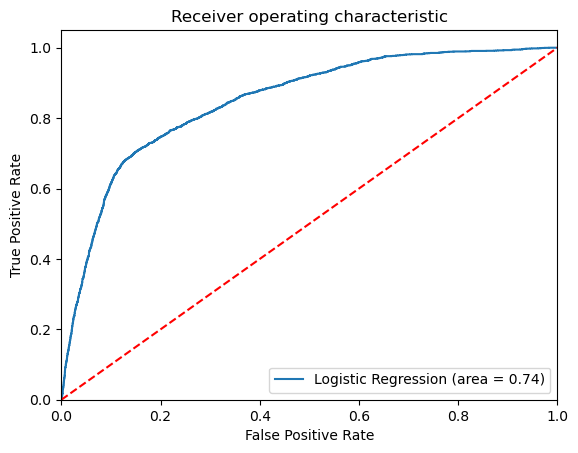

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
test_data = df_test[cols]

predictedData = logreg.predict(test_data)

C:\Users\pramo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
results = pd.DataFrame(predictedData, columns=['cd'])
results_final = pd.concat([df_test, results], axis=1)
results_final = results_final[['id','cd']]

In [ ]:
results_final.to_csv("PredictedData.csv", index=False)

# Decision Tree

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.7978
Precision: 0.5755
Recall: 0.5660


In [ ]:
"""
!pip install graphviz
!pip install pydotplus
!pip install --upgrade scikit-learn
!pip install graphviz
"""

'\n!pip install graphviz\n!pip install pydotplus\n!pip install --upgrade scikit-learn\n!pip install graphviz\n'

In [ ]:
"""
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from io import StringIO
import graphviz

import six
import sys
sys.modules['sklearn.externals.six'] = six

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('cd.png')
#Image(graph.create_png())
"""

"\nfrom sklearn.tree import export_graphviz\nfrom sklearn.externals.six import StringIO  \nfrom IPython.display import Image  \nimport pydotplus\nfrom io import StringIO\nimport graphviz\n\nimport six\nimport sys\nsys.modules['sklearn.externals.six'] = six\n\ndot_data = StringIO()\nexport_graphviz(clf, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True,feature_names = cols,class_names=['0','1'])\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \n#graph.write_png('cd.png')\n#Image(graph.create_png())\n"

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7667691195082263


In [ ]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    #print(scores)


In [ ]:
print(scores)

[0.6802638827212423, 0.7458710614021781, 0.7199430376080871, 0.7499936469409239, 0.7364059852987822, 0.7534382001811218, 0.7439458656847467, 0.7557436122335461, 0.7506719955133244, 0.7580217548601821, 0.7543333875779766, 0.7578860696997697, 0.7557436490095756, 0.7585912537408117, 0.7574251594011023, 0.7600287000133313, 0.7578048939701103, 0.7600558480782226, 0.7583744112387546, 0.7603812791622421, 0.7588625578647836, 0.7608422997889976, 0.7605169128362135, 0.7617644109169642, 0.7616830954383933, 0.7617915038178116, 0.7611677308730169, 0.7623339061199911, 0.7618728965260443, 0.7621982908340345]


Text(0, 0.5, 'Accuracy Score')

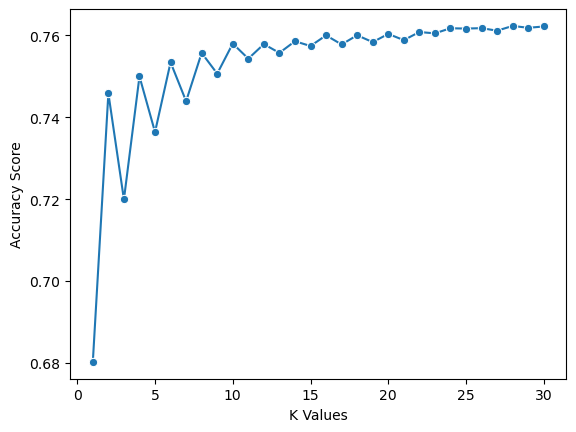

In [ ]:
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
#https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print (best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

28


KNeighborsClassifier(n_neighbors=28)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.7679
Precision: 0.6974
Recall: 0.0404


# Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=112))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               14464     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,593
Trainable params: 14,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
807/807 [==============================] - 3s 3ms/step - loss: 0.4049 - accuracy: 0.8195 - val_loss: 0.3956 - val_accuracy: 0.8276
Epoch 2/5
807/807 [==============================] - 3s 3ms/step - loss: 0.3756 - accuracy: 0.8341 - val_loss: 0.3945 - val_accuracy: 0.8300
Epoch 3/5
807/807 [==============================] - 3s 3ms/step - loss: 0.3640 - accuracy: 0.8390 - val_loss: 0.3969 - val_accuracy: 0.8269
Epoch 4/5
807/807 [==============================] - 3s 3ms/step - loss: 0.3540 - accuracy: 0.8429 - val_loss: 0.3971 - val_accuracy: 0.8272
Epoch 5/5
807/807 [==============================] - 3s 3ms/step - loss: 0.3445 - accuracy: 0.8478 - val_loss: 0.3999 - val_accuracy: 0.8251


[]

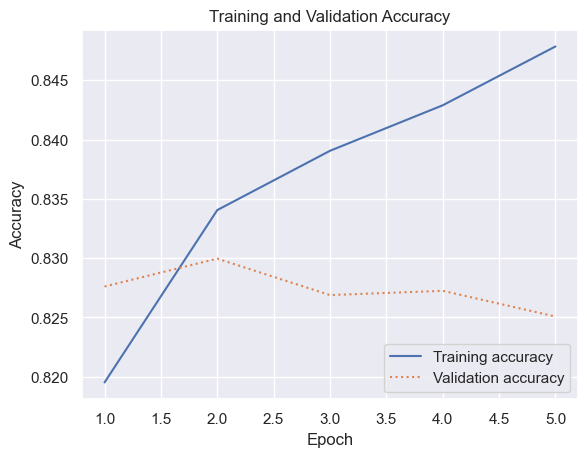

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

346/346 [==============================] - 0s 838us/step


Text(110.44999999999997, 0.5, 'Actual label')

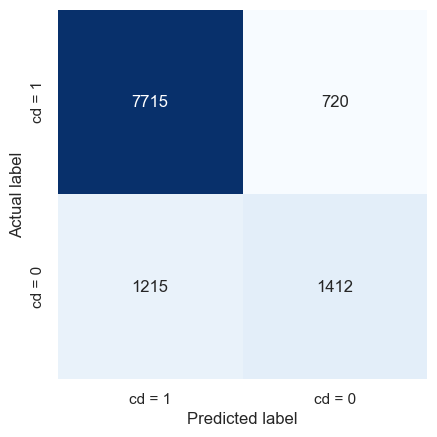

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['cd = 1', 'cd = 0']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

346/346 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8251
Test accuracy: 0.8250768780708313


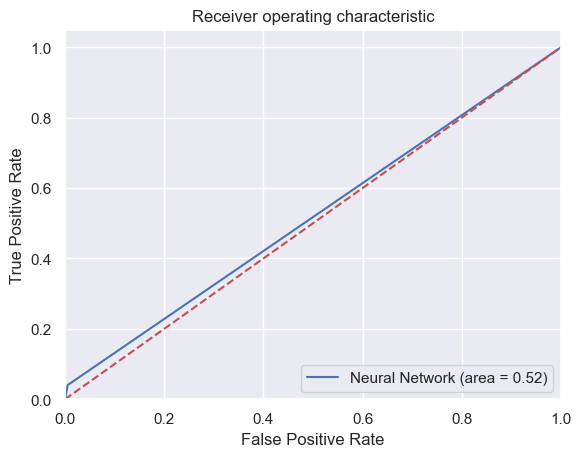

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

